**A1**

In [2]:
# Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Reading the dataset from the CSV file
df=pd.read_csv('/content/Telecom_data.csv')

# All the columns which contain categorical data, to perform one hot encoding
categorical_col=['gender', 'SeniorCitizen', 'Partner','Dependents','tenure','PhoneService',
'MultipleLines', 'InternetService','OnlineSecurity',
'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']

# Replacing the 'No phone service' with 'No', for better consistency in the data
for col in categorical_col:
  if df[col].eq('No phone service').any():
    df[col]=df[col].replace({'No phone service': 'No'})

# Dropping off the customerID
df = df.drop('customerID', axis=1)

# One - hot encoding for the categorical data
encoded_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner','Dependents','PhoneService',
'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','Churn']], drop_first=True)

# Extracting all the feature vectors for which one-hot encoding was not performed
int_df = df[['MonthlyCharges','TotalCharges']]
df_final = pd.concat([int_df, encoded_df], axis=1)

if df_final['TotalCharges'].eq(' ').any():
  df_final['TotalCharges'] = df_final['TotalCharges'].replace({' ': 0})
df_final['TotalCharges'] = df_final['TotalCharges'].astype(float)

df_final['Churn_Yes'].value_counts()
features = df_final.drop(columns = 'Churn_Yes', axis=1)
target = df_final['Churn_Yes']

df_final.head()

,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,29.85,29.85,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,56.95,1889.50,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,53.85,108.15,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,42.30,1840.75,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,70.70,151.65,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

target_column = 'Churn_Yes'
# Extract features (X) and target variable (y)
X = df_final.drop(target_column, axis=1)  # Features
y = df_final[target_column]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create k-NN classifier and fit it to the training data
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# Confusion matrix for training data
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Training Data):")
print(conf_matrix_train)

# Precision, Recall, and F1-Score for training data
precision_train = precision_score(y_train, y_train_pred, average='binary')
recall_train = recall_score(y_train, y_train_pred, average='binary')
f1_train = f1_score(y_train, y_train_pred, average='binary')

print("\nPrecision (Training Data):", precision_train)
print("Recall (Training Data):", recall_train)
print("F1-Score (Training Data):", f1_train)

# Confusion matrix for testing data
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Testing Data):")
print(conf_matrix_test)

# Precision, Recall, and F1-Score for testing data
precision_test = precision_score(y_test, y_test_pred, average='binary')
recall_test = recall_score(y_test, y_test_pred, average='binary')
f1_test = f1_score(y_test, y_test_pred, average='binary')

print("\nPrecision (Testing Data):", precision_test)
print("Recall (Testing Data):", recall_test)
print("F1-Score (Testing Data):", f1_test)

# Accuracy for training and testing data
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nAccuracy (Training Data):", accuracy_train)
print("Accuracy (Testing Data):", accuracy_test)

Confusion Matrix (Training Data):
[[2882  223]
 [ 415  705]]

Precision (Training Data): 0.759698275862069
Recall (Training Data): 0.6294642857142857
F1-Score (Training Data): 0.6884765625000001

Confusion Matrix (Testing Data):
[[1783  286]
 [ 381  368]]

Precision (Testing Data): 0.5626911314984709
Recall (Testing Data): 0.49132176234979974
F1-Score (Testing Data): 0.5245901639344263

Accuracy (Training Data): 0.8489940828402367
Accuracy (Testing Data): 0.7633073101490419


**A2**

In [ ]:
dataframe = pd.read_excel('Lab Session1 Data.xlsx', sheet_name=1)
dataframe = dataframe.drop('Date',axis=1)

from sklearn.preprocessing import LabelEncoder
#Defining the categorial columns present in the data
categorical_columns = ['Month', 'Day']
label_encoder = LabelEncoder()
#Label encoding the categorial columns

for col in categorical_columns:
    dataframe[col] = label_encoder.fit_transform(dataframe[col])
#Converting the Volume column into numerical data and removing the end alphabet
dataframe['Volume'] = dataframe['Volume'].apply(lambda x: float(x[:-1]) * 1e3 if x.endswith('K') else float(x[:-1]) * 1e6 if x.endswith('M') else float(x))
dataframe.head()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   249 non-null    int64  
 1   Day     249 non-null    int64  
 2   Price   249 non-null    float64
 3   Open    249 non-null    float64
 4   High    249 non-null    float64
 5   Low     249 non-null    float64
 6   Volume  249 non-null    float64
 7   Chg%    249 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 15.7 KB


In [ ]:
X = dataframe[['Month', 'Day', 'Open', 'High', 'Low', 'Volume', 'Chg%']]
y = dataframe['Price']
#Defining the features and outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
#Splitting the data into training and testing
k = 5
model = KNeighborsRegressor(n_neighbors=5)
#Applying K Regressor withe the number of neighbours as 5
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Calculating the various error values using their respective formula
MSE = np.mean((y_test - y_pred) ** 2)
RMSE = np.sqrt(MSE)
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) ** 2)
ss_residual = np.sum((y_test - y_pred) ** 2)
r2_score = 1 - (ss_residual / ss_total)
print("Mean Squared Error:",MSE)
print("Root Mean Squared Error:",RMSE)
print("Mean Absolute Percentage Error:",MAPE)
print("R-squared Score:",r2_score)

Mean Squared Error: 46708.95007800001
Root Mean Squared Error: 216.12253486853243
Mean Absolute Percentage Error: 10.583110130461558
R-squared Score: 0.2374135752304879


**A3**

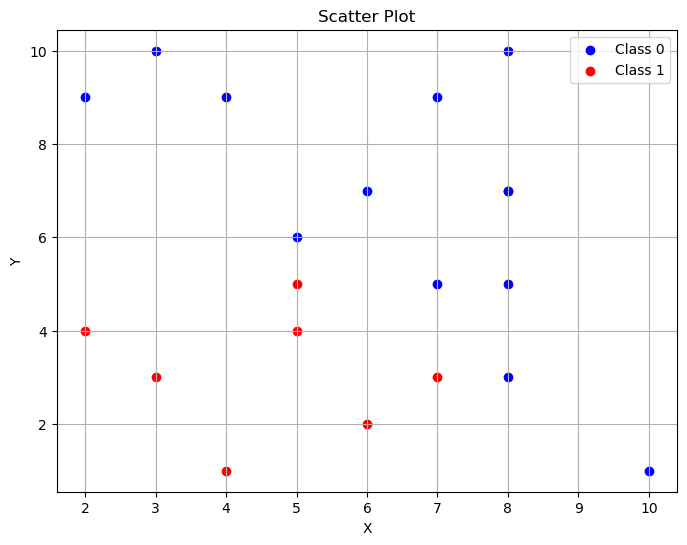

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
num_points = 20
#Generating 20 points between 1 to 10
X = np.random.randint(1, 11, num_points)
Y = np.random.randint(1, 11, num_points)

class_0 = []
class_1 = []

#Dividing the points in class 0 and class 1 on the condition that 
#if the sum of the points is above 10 then it belongs to class 0
#Or else it belongs to class 1
for i in range(num_points):
    if X[i]+Y[i] > 10:
        class_0.append((X[i], Y[i]))
    else:
        class_1.append((X[i], Y[i]))

class_0 = np.array(class_0)
class_1 = np.array(class_1)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

**A3**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Generating 10000 points for the test data at an interval of 0.1
x_test = np.arange(0, 10.1, 0.1)
y_test = np.arange(0, 10.1, 0.1)

x, y = np.meshgrid(x_test, y_test)
test_points = np.c_[x.ravel(), y.ravel()]
#Training the k-nn classifier with the 20 points generated (k=3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
X_train = np.concatenate((class_0, class_1))
y_train = np.concatenate((np.zeros(len(class_0)), np.ones(len(class_1))))
knn_classifier.fit(X_train, y_train)
#Applying the k-nn classifier on test data to classify the 10000 points
y_pred = knn_classifier.predict(test_points)

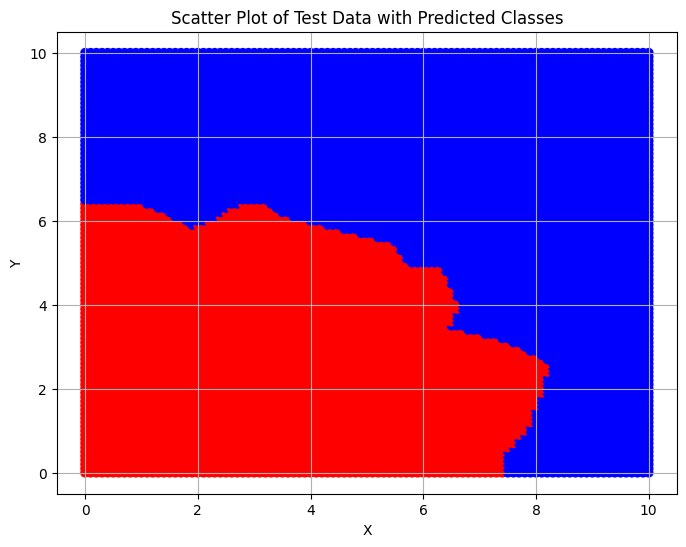

In [ ]:
#Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(test_points[:, 0], test_points[:, 1], c=['red' if pred == 1 else 'blue' for pred in y_pred])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Test Data with Predicted Classes')
plt.grid(True)
plt.show()

**A4**

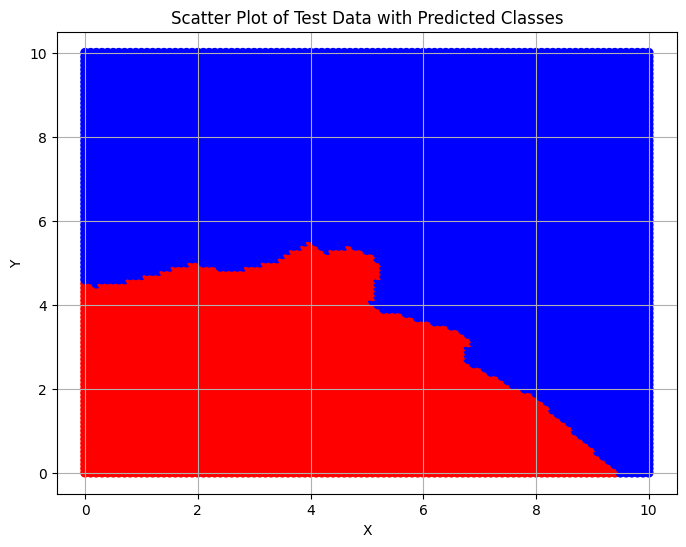

In [ ]:
#Applying different values of k and testing the data
k_values = [1,5,7,10]
for k in k_values:
  k_nn_classifier = KNeighborsClassifier(n_neighbors=k)
  k_nn_classifier.fit(X_train, y_train)
  y_pred_k_nn = k_nn_classifier.predict(test_points)
  plt.figure(figsize=(8, 6))
  plt.scatter(test_points[:, 0], test_points[:, 1], c=['red' if pred == 1 else 'blue' for pred in y_pred_k_nn])
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Scatter Plot of Test Data with Predicted Classes')
  plt.grid(True)
  plt.show()

**A5**

In [ ]:
from sklearn.model_selection import GridSearchCV
#Finding the ideal value of k using grid search
param_grid = {'n_neighbors': np.arange(1, 11)}
grid_search = GridSearchCV(knn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Ideal 'k' value:", grid_search.best_params_)

Ideal 'k' value: {'n_neighbors': 7}


**A6**

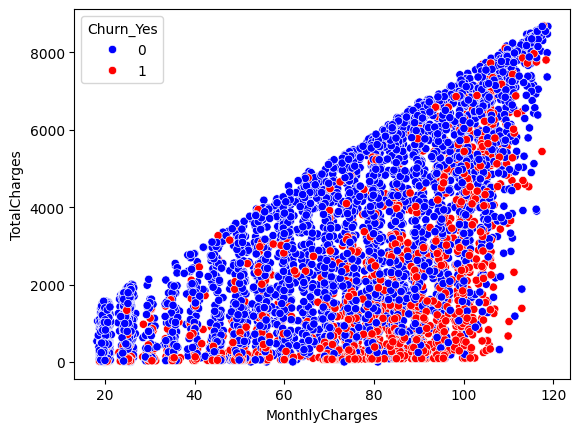

In [ ]:
# A6 (A3 for project data)

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of the training data and color the points as per their class color
sns.scatterplot(x="MonthlyCharges", y="TotalCharges", hue="Churn_Yes", data=df_final, palette={0: "blue", 1: "red"})
plt.show()

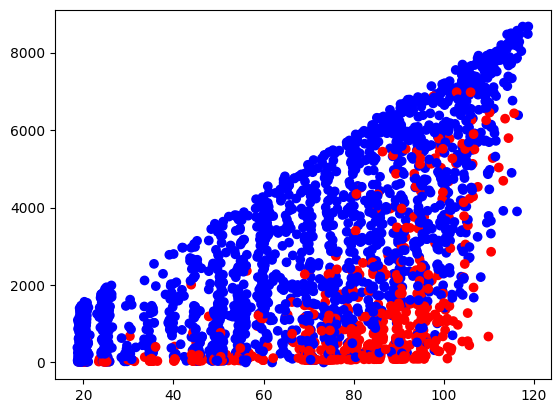

In [ ]:
# A6 (A4 for project data)

target_column = 'Churn_Yes'
# Extract features (X) and target variable (y)
X = df_final.drop(target_column, axis=1)  # Features
y = df_final[target_column]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assuming X_train and y_train are your training features and labels
# Assuming X_test is your test data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Plotting the test data with predicted class colors
plt.scatter(X_test['MonthlyCharges'], X_test['TotalCharges'], c=np.where(predictions == 0, 'blue', 'red'))
plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assuming df_final is already defined
target_column = 'Churn_Yes'
X = df_final.drop(target_column, axis=1)  # Features
y = df_final[target_column]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Selecting the first two features for visualization
X_train_subset = X_train.iloc[:, :2]
X_test_subset = X_test.iloc[:, :2]

# Create a meshgrid for feature space
x_min, x_max = X_test_subset.iloc[:, 0].min() - 1, X_test_subset.iloc[:, 0].max() + 1
y_min, y_max = X_test_subset.iloc[:, 1].min() - 1, X_test_subset.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Define the k values for the experiment
k_values = [1, 3, 5, 7]

# Plot the class boundary lines for different k values
plt.figure(figsize=(12, 12))
for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_subset, y_train)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.subplot(2, 2, i+1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_test_subset.iloc[:, 0], X_test_subset.iloc[:, 1], c=np.where(y_test.values == 0, 'blue', 'red'))
    plt.title("k = {}".format(k))

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

<Figure size 1200x1200 with 0 Axes>

**A7**

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 11)}
knn_classifier = KNeighborsClassifier(n_neighbors=3)
grid_search = GridSearchCV(knn_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Ideal 'k' value:", grid_search.best_params_)

Ideal 'k' value: {'n_neighbors': 10}
